# TensorFlow Model

In [16]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn

In [17]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
!pip install imbalanced-learn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from keras import regularizers

from numpy.random import seed
seed(1)
tf.random.set_seed(2)

## Load & Split data

In [21]:
txns = pd.read_csv('./train.csv')
txns.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [22]:
properties = list(txns.columns.values)
properties.remove('ID_code')
properties.remove('target')
print(properties)
X = txns[properties]
y = txns['target']

['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', 'var_100'

In [23]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## SMOTE - Minority Oversampling

[]

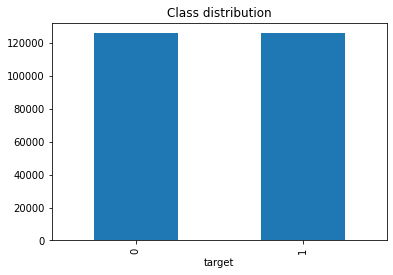

In [25]:
over = SMOTE(sampling_strategy=0.7, random_state=11, k_neighbors=7)
under = RandomUnderSampler(sampling_strategy=1, random_state=11)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# Check the class distribution
pd.concat([X, y], axis=1).pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

In [26]:
# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)

## Model Creation, Compiling & Fitting

In [27]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(200,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC', 
                           'Accuracy',
                           'Precision',
                           'Recall'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                  callbacks=[earlyStopping])

Epoch 1/100
5510/5510 [==============================] - 35s 6ms/step - loss: 0.4782 - auc: 0.8525 - Accuracy: 0.7719 - precision: 0.7645 - recall: 0.7858 - val_loss: 0.4561 - val_auc: 0.8883 - val_Accuracy: 0.7878 - val_precision: 0.8687 - val_recall: 0.6781
Epoch 2/100
5510/5510 [==============================] - 33s 6ms/step - loss: 0.4136 - auc: 0.8927 - Accuracy: 0.8139 - precision: 0.8088 - recall: 0.8221 - val_loss: 0.3932 - val_auc: 0.9047 - val_Accuracy: 0.8251 - val_precision: 0.8311 - val_recall: 0.8161
Epoch 3/100
5510/5510 [==============================] - 33s 6ms/step - loss: 0.3851 - auc: 0.9079 - Accuracy: 0.8298 - precision: 0.8283 - recall: 0.8321 - val_loss: 0.3931 - val_auc: 0.9090 - val_Accuracy: 0.8256 - val_precision: 0.8586 - val_recall: 0.7797
Epoch 4/100
5510/5510 [==============================] - 34s 6ms/step - loss: 0.3686 - auc: 0.9161 - Accuracy: 0.8389 - precision: 0.8389 - recall: 0.8388 - val_loss: 0.3934 - val_auc: 0.9099 - val_Accuracy: 0.8253 - val

## Evaluate the Model

### Training vs Validation Plot - Loss, AUC, Accuracy, Precision, Recall 

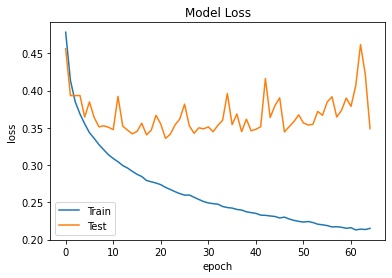

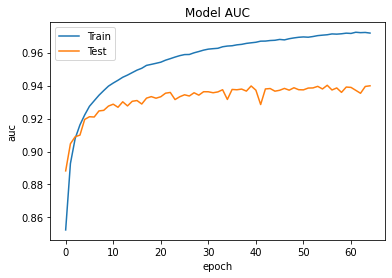

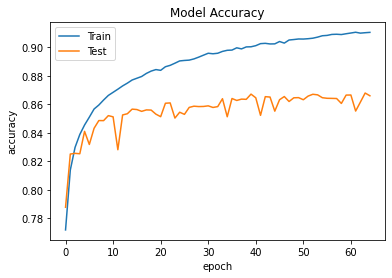

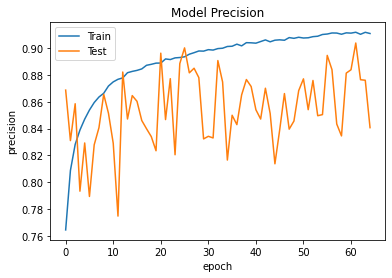

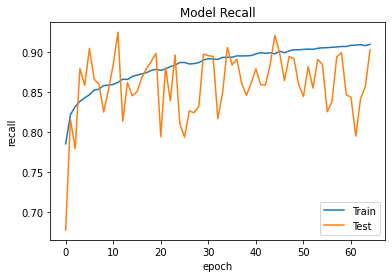

In [28]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



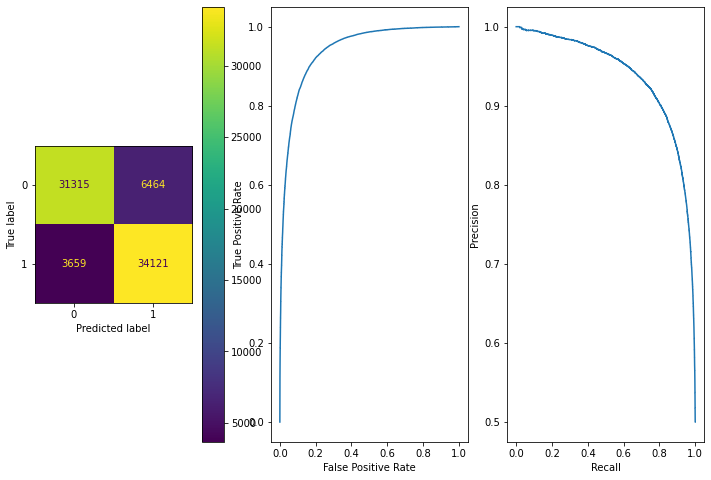

In [29]:
y_score = model.predict(X_test)[:,0]
y_pred = list(map(lambda pred: 1 if pred > 0.5 else 0, y_score))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.8660252253206104
Precision:  0.8407293334975976
Recall:  0.9031498147167814
F1-Score:  0.8708224334843361
